In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [5]:
folder='Data/usr/'
FilesPre=os.listdir(folder)
FileList=[os.path.join(folder,FilesPre[i]) for i in range(len(FilesPre)) if FilesPre[i].endswith('spa') and (not 'dim' in FilesPre[i])]
FileList10k=[FileList[i] for i in range(len(FileList)) if ( '10k' in FileList[i])]
FileList100k=[FileList[i] for i in range(len(FileList)) if ( '100k' in FileList[i])]
FileList10000k=[FileList[i] for i in range(len(FileList)) if ( '10000k' in FileList[i])]
FileZlatt=[os.path.join(folder,FilesPre[i]) for i in range(len(FilesPre)) if FilesPre[i].endswith('spa')]
FileList10k.sort()
FileList100k.sort()
FileList10000k.sort()
FileZlatt.sort()
FileList100k

['Data/usr/80w_amp100k.spa',
 'Data/usr/80w_seed100k.spa',
 'Data/usr/nufern100k.spa',
 'Data/usr/sh80w100k.spa']

In [3]:
def trnas(tile):
    dat=pd.read_csv(tile, delimiter="\t")
    readat=dat[dat['<ANRITSU>'].str.startswith('P_')]
    readat.set_index(np.arange(len(readat)),inplace=True)
    finaldat=readat['<ANRITSU>'].str.strip().str.split('=').str[1].str[:-3].str.split(',',expand=True)
    finaldat.columns=['Power/dbm','Frequency']
    finaldat=finaldat[['Power/dbm','Frequency']].apply(pd.to_numeric)
    finaldat=pd.DataFrame({'Frequency/MHz':finaldat['Frequency'][:551].reset_index(drop=True),'Power/dbm(A)':finaldat['Power/dbm'][:551].reset_index(drop=True),
                           'Power/dbm(B)':finaldat['Power/dbm'][0+551:551+551].reset_index(drop=True),
                           'Power/dbm(C)':finaldat['Power/dbm'][0+2*551:3*551].reset_index(drop=True)})
    return finaldat

/Users/boxiao/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Data/usr/80w_amp100k.spa
Data/usr/sh80w100k.spa
Data/usr/80w_seed100k.spa


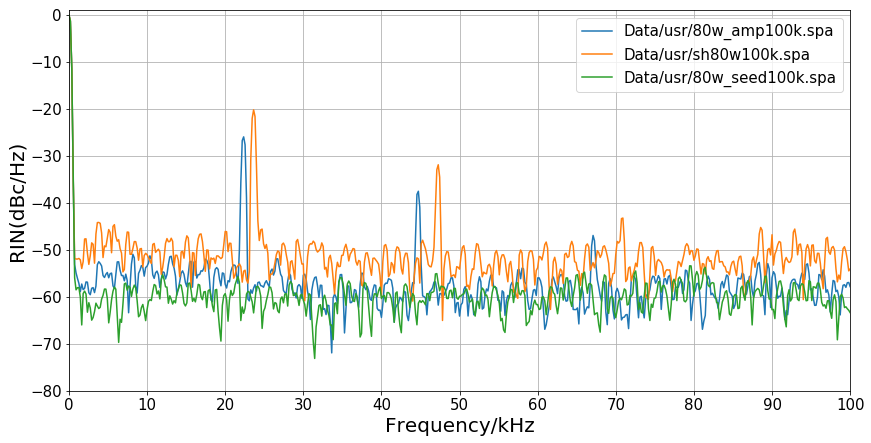

In [12]:
plt.figure(figsize=(14,7))
plt.grid('True')
#plt.axis(fontsize=30)
plt.ylabel('RIN(dBc/Hz)',fontsize=20)
plt.xlabel('Frequency/kHz',fontsize=20)
plt.ylim((-80,1))
plt.xlim((0,100))
plt.xticks(np.linspace(0, 100, 11),fontsize=15)
plt.yticks(fontsize=15)
for File in [FileList100k[0],FileList100k[3],FileList100k[1]]:
    print(File)
    finaldat=trnas(File)
    if File.split('/')[2].startswith('z'):
        plt.plot(finaldat['Frequency/MHz']*1000,finaldat['Power/dbm(A)']-finaldat['Power/dbm(A)'][0],'-',label=File)
    else:
        plt.plot(finaldat['Frequency/MHz']*1000,finaldat['Power/dbm(A)']-finaldat['Power/dbm(A)'][0],'-',label=File)
# finaldat=trnas('Data/usr/nufern10k.spa')
# plt.plot(finaldat['Frequency/MHz']*1000,finaldat['Power/dbm(A)']-finaldat['Power/dbm(A)'][0],'-',label='Data/usr/nufern10k.spa')
plt.legend(loc='best',fontsize=15)
plt.savefig(os.path.join(folder,'todayvsyesterdaysh80w.pdf'))
plt.savefig(os.path.join(folder,'todayvsyesterdaysh80w.png'),dpi = 1200)